In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# set to display all the columns in dataset

pd.set_option("display.max_columns",None)

#to run sql quries on data frame

import pandasql as psql

In [2]:
#load the train data

train=pd.read_csv(r"C:\H6\train.csv\train.csv")

In [3]:
#Display first 5 records

train.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,gender_Female,age_[70-80),age_[60-70),age_[50-60),age_[80-90),age_[40-50),payer_code_?,payer_code_MC,payer_code_HM,payer_code_SP,payer_code_BC,medical_specialty_?,medical_specialty_InternalMedicine,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Cardiology,diag_1_428,diag_1_414,diag_1_786,diag_2_276,diag_2_428,diag_2_250,diag_2_427,diag_3_250,diag_3_401,diag_3_276,diag_3_428,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,chlorpropamide_No,glimepiride_No,acetohexamide_No,glipizide_No,glyburide_No,tolbutamide_No,pioglitazone_No,rosiglitazone_No,acarbose_No,miglitol_No,troglitazone_No,tolazamide_No,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,0


In [4]:
#Display the information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  bool 
 9   race_AfricanAmerican                      25000 non-null  bool 
 10  gender_Female                             25000 non-null  

In [5]:
#Shape

train.shape

(25000, 65)

In [6]:
#copy to backup file

train_bk=train.copy()

In [7]:
#count the target or dependent variable by '0' & '1' and their proportion
# (>-10 : 1, then the dataset is instance data)

readmitted_count=train.readmitted.value_counts()
print("Class 0: ",readmitted_count[0])
print("Class 1: ",readmitted_count[1])
print("Proportion: ",round(readmitted_count[0]/readmitted_count[1],2),':1')
print("Total readmitted records: ",len(train))

Class 0:  13590
Class 1:  11410
Proportion:  1.19 :1
Total readmitted records:  25000


In [8]:
#Displaying the duplicates

train_dup=train[train.duplicated(keep='last')]
train_dup

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,gender_Female,age_[70-80),age_[60-70),age_[50-60),age_[80-90),age_[40-50),payer_code_?,payer_code_MC,payer_code_HM,payer_code_SP,payer_code_BC,medical_specialty_?,medical_specialty_InternalMedicine,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Cardiology,diag_1_428,diag_1_414,diag_1_786,diag_2_276,diag_2_428,diag_2_250,diag_2_427,diag_3_250,diag_3_401,diag_3_276,diag_3_428,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,chlorpropamide_No,glimepiride_No,acetohexamide_No,glipizide_No,glyburide_No,tolbutamide_No,pioglitazone_No,rosiglitazone_No,acarbose_No,miglitol_No,troglitazone_No,tolazamide_No,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted


In [9]:
#null values

train.isnull().sum()

time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
                             ..
metformin-rosiglitazone_No    0
metformin-pioglitazone_No     0
change_No                     0
diabetesMed_Yes               0
readmitted                    0
Length: 65, dtype: int64

In [10]:
#columns

train.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

In [11]:
#Dropping columns

del_cols=['race_Caucasian',
       'race_AfricanAmerican', 'gender_Female','medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma','age_[70-80)', 'age_[60-70)','age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
       'tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No',
       'miglitol_No', 'troglitazone_No', 'tolazamide_No', 'examide_No',
       'citoglipton_No', 'insulin_No', 'glyburide-metformin_No',
       'glipizide-metformin_No', 'glimepiride-pioglitazone_No',
       'metformin-rosiglitazone_No','metformin-pioglitazone_No', 'change_No',
       'diabetesMed_Yes']

train_new=train.drop(del_cols,axis=1)

In [12]:
#display sample data

train_new.sample(5)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
23045,2,10,0,15,0,0,0,6,0
21370,3,32,1,7,0,0,0,5,0
17716,7,45,2,17,2,0,1,5,0
5260,1,3,0,4,0,0,0,9,0
10635,6,49,1,6,0,0,1,9,0


In [13]:
#info

train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   time_in_hospital    25000 non-null  int64
 1   num_lab_procedures  25000 non-null  int64
 2   num_procedures      25000 non-null  int64
 3   num_medications     25000 non-null  int64
 4   number_outpatient   25000 non-null  int64
 5   number_emergency    25000 non-null  int64
 6   number_inpatient    25000 non-null  int64
 7   number_diagnoses    25000 non-null  int64
 8   readmitted          25000 non-null  int64
dtypes: int64(9)
memory usage: 1.7 MB


In [14]:
#Counting the Values

train['number_emergency'].value_counts()

0     22143
1      1904
2       558
3       168
4        87
5        41
6        28
7        23
9        10
8        10
10        5
11        5
13        3
12        3
20        2
16        2
46        1
64        1
42        1
18        1
14        1
19        1
29        1
22        1
Name: number_emergency, dtype: int64

In [15]:
#Counting the Values

train['num_lab_procedures'].value_counts()

1      817
43     719
44     614
45     581
40     541
      ... 
103      2
101      2
113      1
102      1
126      1
Name: num_lab_procedures, Length: 108, dtype: int64

In [16]:
#Counting the Values

train['num_procedures'].value_counts()

0    11445
1     5083
2     3160
3     2310
6     1225
4     1041
5      736
Name: num_procedures, dtype: int64

In [17]:
#Counting the Values

train['num_medications'].value_counts()

12    1467
15    1424
11    1420
13    1413
14    1411
      ... 
72       1
66       1
81       1
68       1
61       1
Name: num_medications, Length: 71, dtype: int64

In [18]:
#Counting the Values

train['number_outpatient'].value_counts()

0     20831
1      2172
2       899
3       479
4       258
5       143
6        78
7        34
8        22
9        19
11       15
10       13
13        7
14        7
17        3
16        3
12        3
21        3
24        2
18        2
36        1
15        1
22        1
20        1
19        1
34        1
29        1
Name: number_outpatient, dtype: int64

In [19]:
#Counting the Values

train['number_inpatient'].value_counts()

0     16542
1      4792
2      1889
3       871
4       412
5       198
6       111
7        75
8        38
9        31
10       17
11        9
12        5
13        5
15        2
21        1
16        1
19        1
Name: number_inpatient, dtype: int64

In [20]:
#Counting the Values

train['number_diagnoses'].value_counts()

9     12172
5      2767
7      2578
8      2567
6      2489
4      1373
3       708
2       257
1        59
16       11
13        5
14        3
15        3
12        3
10        3
11        2
Name: number_diagnoses, dtype: int64

In [21]:
#Identify the variables to normalize with minmaxscalar

cols=['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses']

In [22]:
#identify the independent and target (dependent) variables

Indepvar=[]
for col in train_new.columns:
    if col!='readmitted':
        Indepvar.append(col)
targetvar='readmitted'
x=train_new[Indepvar]
y=train_new[targetvar]

In [23]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape


((17500, 8), (7500, 8), (17500,), (7500,))

In [24]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0 , 1))

x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)

x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

# KNN Algorithm

In [25]:
#load the KNN_Results Data

KNN_Results=pd.read_csv(r"C:\H6\KNN_Results.csv")
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[1690 1747]
 [1716 2347]]
Outcome values : 
 1690 1747 1716 2347
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.49      0.49      3437
           0       0.57      0.58      0.58      4063

    accuracy                           0.54      7500
   macro avg       0.53      0.53      0.53      7500
weighted avg       0.54      0.54      0.54      7500

Accuracy : 53.8 %
Precision : 49.6 %
Recall : 49.2 %
F1 Score : 0.494
Specificity or True Negative Rate : 57.8 %
Balanced Accuracy : 53.5 %
MCC : 0.069
roc_auc_score: 0.535


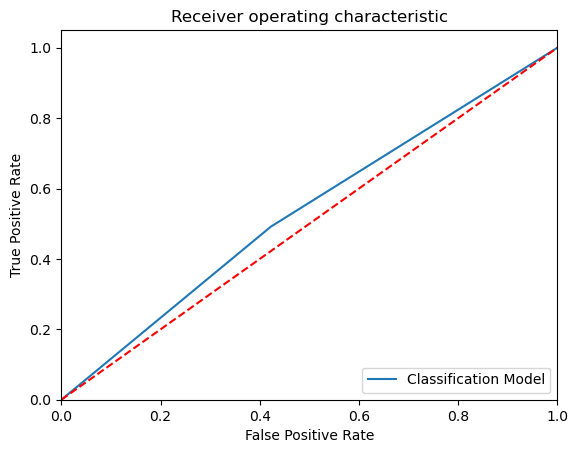

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 905 2532]
 [ 771 3292]]
Outcome values : 
 905 2532 771 3292
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.26      0.35      3437
           0       0.57      0.81      0.67      4063

    accuracy                           0.56      7500
   macro avg       0.55      0.54      0.51      7500
weighted avg       0.55      0.56      0.52      7500

Accuracy : 56.0 %
Precision : 54.0 %
Recall : 26.3 %
F1 Score : 0.354
Specificity or True Negative Rate : 81.0 %
Balanced Accuracy : 53.6 %
MCC : 0.088
roc_auc_score: 0.537


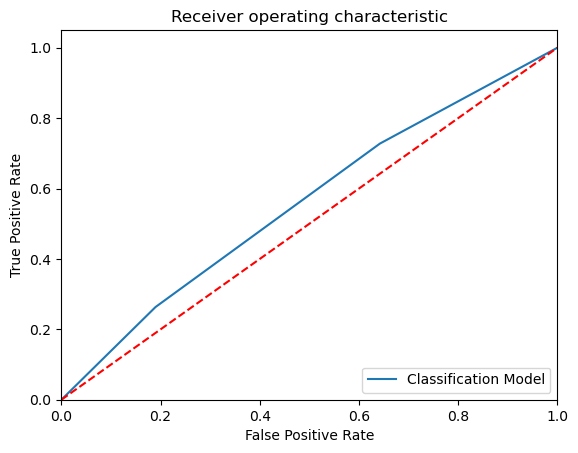

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[1700 1737]
 [1553 2510]]
Outcome values : 
 1700 1737 1553 2510
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.49      0.51      3437
           0       0.59      0.62      0.60      4063

    accuracy                           0.56      7500
   macro avg       0.56      0.56      0.56      7500
weighted avg       0.56      0.56      0.56      7500

Accuracy : 56.1 %
Precision : 52.3 %
Recall : 49.5 %
F1 Score : 0.508
Specificity or True Negative Rate : 61.8 %
Balanced Accuracy : 55.6 %
MCC : 0.113
roc_auc_score: 0.556


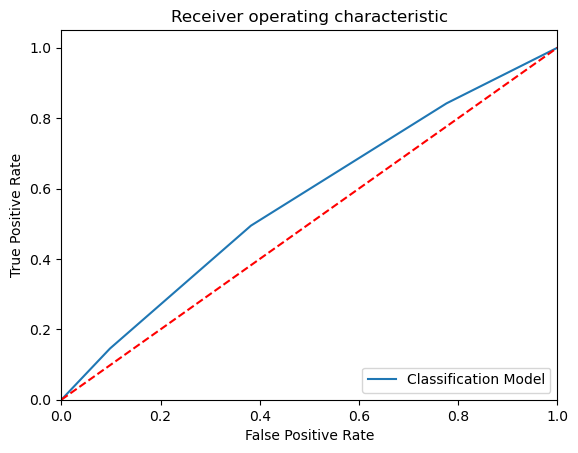

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[1131 2306]
 [ 944 3119]]
Outcome values : 
 1131 2306 944 3119
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.33      0.41      3437
           0       0.57      0.77      0.66      4063

    accuracy                           0.57      7500
   macro avg       0.56      0.55      0.53      7500
weighted avg       0.56      0.57      0.54      7500

Accuracy : 56.7 %
Precision : 54.5 %
Recall : 32.9 %
F1 Score : 0.41
Specificity or True Negative Rate : 76.8 %
Balanced Accuracy : 54.8 %
MCC : 0.108
roc_auc_score: 0.548


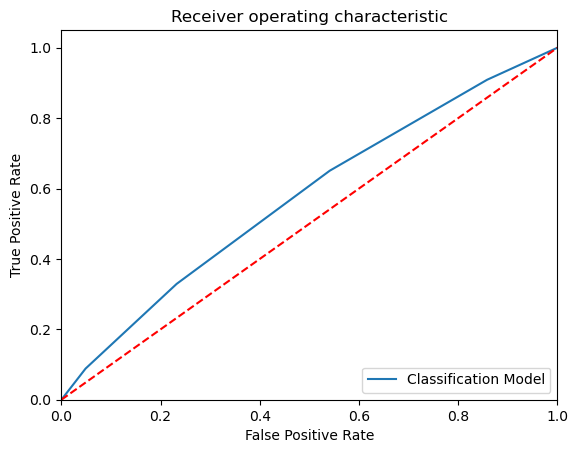

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1663 1774]
 [1484 2579]]
Outcome values : 
 1663 1774 1484 2579
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.48      0.51      3437
           0       0.59      0.63      0.61      4063

    accuracy                           0.57      7500
   macro avg       0.56      0.56      0.56      7500
weighted avg       0.56      0.57      0.56      7500

Accuracy : 56.6 %
Precision : 52.8 %
Recall : 48.4 %
F1 Score : 0.505
Specificity or True Negative Rate : 63.5 %
Balanced Accuracy : 56.0 %
MCC : 0.12
roc_auc_score: 0.559


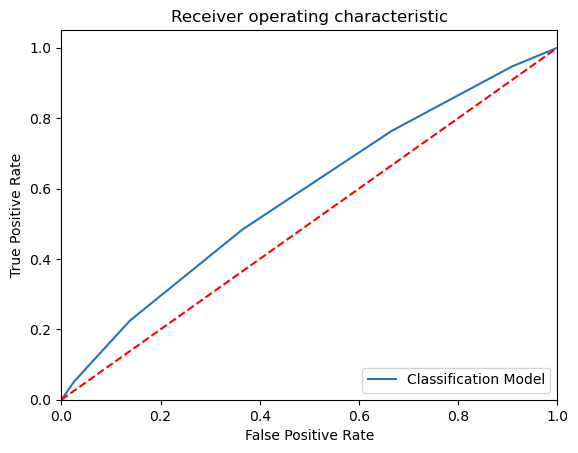

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[1239 2198]
 [1001 3062]]
Outcome values : 
 1239 2198 1001 3062
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.36      0.44      3437
           0       0.58      0.75      0.66      4063

    accuracy                           0.57      7500
   macro avg       0.57      0.56      0.55      7500
weighted avg       0.57      0.57      0.56      7500

Accuracy : 57.3 %
Precision : 55.3 %
Recall : 36.0 %
F1 Score : 0.436
Specificity or True Negative Rate : 75.4 %
Balanced Accuracy : 55.7 %
MCC : 0.124
roc_auc_score: 0.557


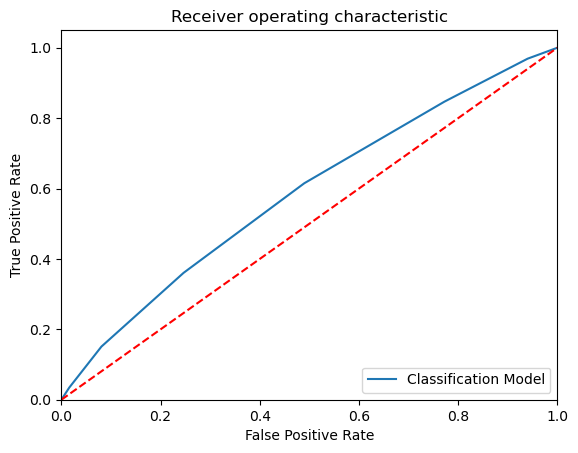

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[1661 1776]
 [1463 2600]]
Outcome values : 
 1661 1776 1463 2600
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.48      0.51      3437
           0       0.59      0.64      0.62      4063

    accuracy                           0.57      7500
   macro avg       0.56      0.56      0.56      7500
weighted avg       0.57      0.57      0.57      7500

Accuracy : 56.8 %
Precision : 53.2 %
Recall : 48.3 %
F1 Score : 0.506
Specificity or True Negative Rate : 64.0 %
Balanced Accuracy : 56.2 %
MCC : 0.125
roc_auc_score: 0.562


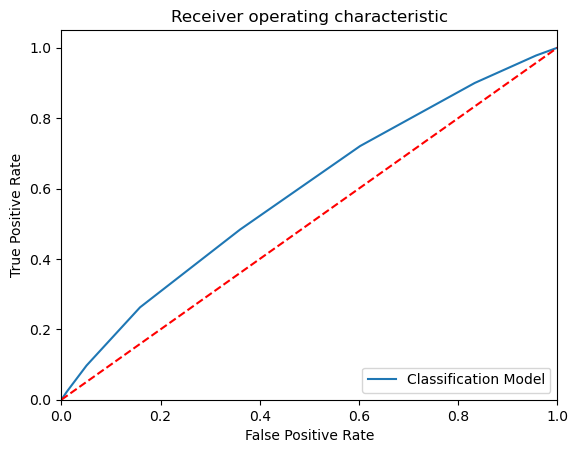

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[1282 2155]
 [1021 3042]]
Outcome values : 
 1282 2155 1021 3042
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.37      0.45      3437
           0       0.59      0.75      0.66      4063

    accuracy                           0.58      7500
   macro avg       0.57      0.56      0.55      7500
weighted avg       0.57      0.58      0.56      7500

Accuracy : 57.7 %
Precision : 55.7 %
Recall : 37.3 %
F1 Score : 0.447
Specificity or True Negative Rate : 74.9 %
Balanced Accuracy : 56.1 %
MCC : 0.131
roc_auc_score: 0.561


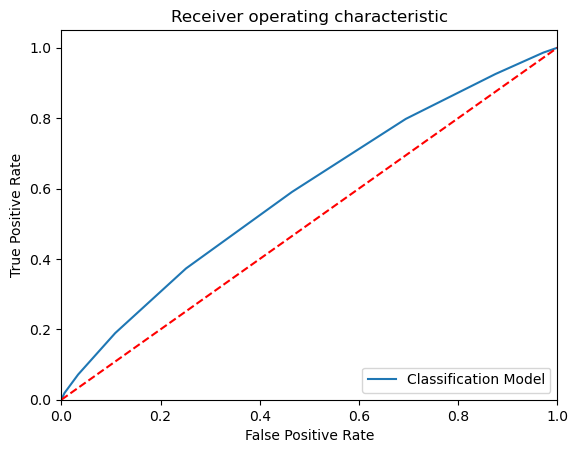

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[1646 1791]
 [1403 2660]]
Outcome values : 
 1646 1791 1403 2660
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.48      0.51      3437
           0       0.60      0.65      0.62      4063

    accuracy                           0.57      7500
   macro avg       0.57      0.57      0.57      7500
weighted avg       0.57      0.57      0.57      7500

Accuracy : 57.4 %
Precision : 54.0 %
Recall : 47.9 %
F1 Score : 0.508
Specificity or True Negative Rate : 65.5 %
Balanced Accuracy : 56.7 %
MCC : 0.136
roc_auc_score: 0.567


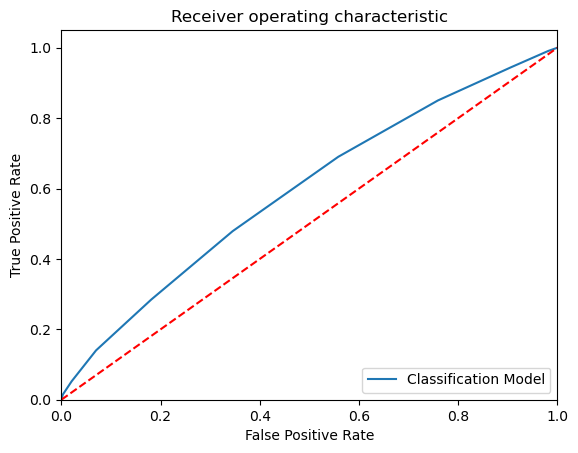

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[1302 2135]
 [1043 3020]]
Outcome values : 
 1302 2135 1043 3020
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.38      0.45      3437
           0       0.59      0.74      0.66      4063

    accuracy                           0.58      7500
   macro avg       0.57      0.56      0.55      7500
weighted avg       0.57      0.58      0.56      7500

Accuracy : 57.6 %
Precision : 55.5 %
Recall : 37.9 %
F1 Score : 0.45
Specificity or True Negative Rate : 74.3 %
Balanced Accuracy : 56.1 %
MCC : 0.131
roc_auc_score: 0.561


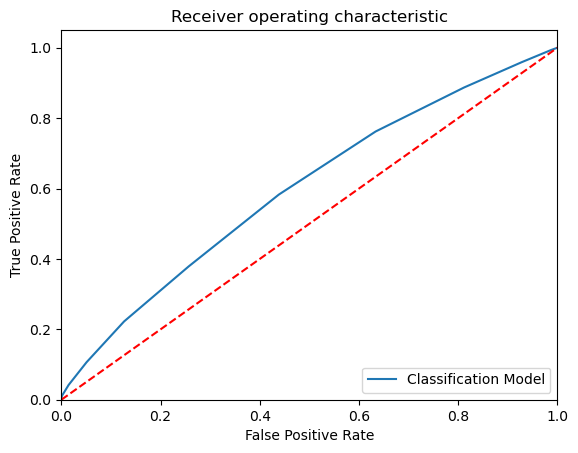

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[1637 1800]
 [1390 2673]]
Outcome values : 
 1637 1800 1390 2673
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.48      0.51      3437
           0       0.60      0.66      0.63      4063

    accuracy                           0.57      7500
   macro avg       0.57      0.57      0.57      7500
weighted avg       0.57      0.57      0.57      7500

Accuracy : 57.5 %
Precision : 54.1 %
Recall : 47.6 %
F1 Score : 0.506
Specificity or True Negative Rate : 65.8 %
Balanced Accuracy : 56.7 %
MCC : 0.136
roc_auc_score: 0.567


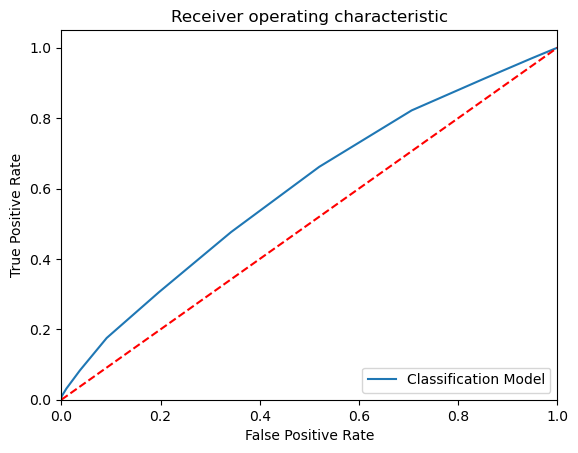

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[1329 2108]
 [1073 2990]]
Outcome values : 
 1329 2108 1073 2990
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.39      0.46      3437
           0       0.59      0.74      0.65      4063

    accuracy                           0.58      7500
   macro avg       0.57      0.56      0.55      7500
weighted avg       0.57      0.58      0.56      7500

Accuracy : 57.6 %
Precision : 55.3 %
Recall : 38.7 %
F1 Score : 0.455
Specificity or True Negative Rate : 73.6 %
Balanced Accuracy : 56.2 %
MCC : 0.131
roc_auc_score: 0.561


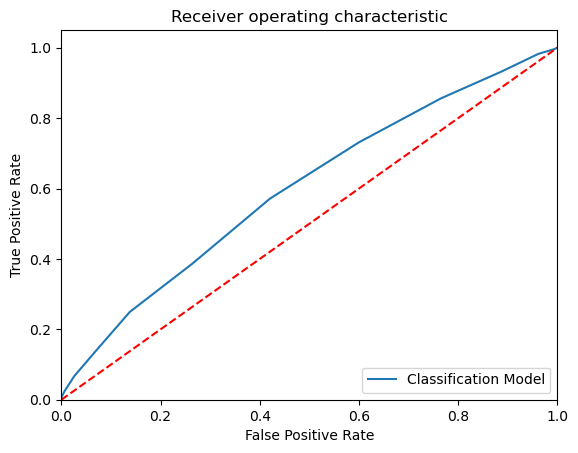

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[1632 1805]
 [1360 2703]]
Outcome values : 
 1632 1805 1360 2703
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.47      0.51      3437
           0       0.60      0.67      0.63      4063

    accuracy                           0.58      7500
   macro avg       0.57      0.57      0.57      7500
weighted avg       0.57      0.58      0.57      7500

Accuracy : 57.8 %
Precision : 54.5 %
Recall : 47.5 %
F1 Score : 0.508
Specificity or True Negative Rate : 66.5 %
Balanced Accuracy : 57.0 %
MCC : 0.143
roc_auc_score: 0.57


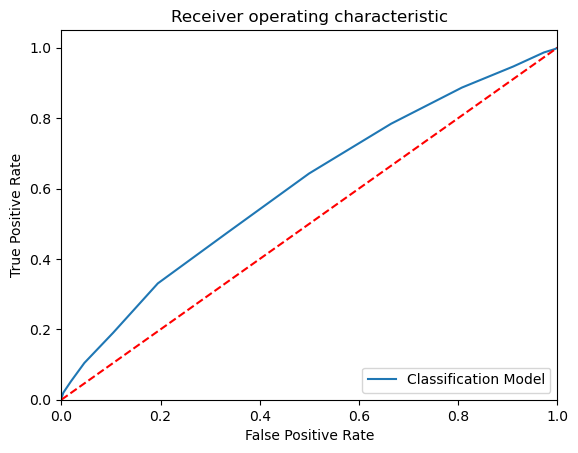

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[1382 2055]
 [1089 2974]]
Outcome values : 
 1382 2055 1089 2974
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.40      0.47      3437
           0       0.59      0.73      0.65      4063

    accuracy                           0.58      7500
   macro avg       0.58      0.57      0.56      7500
weighted avg       0.58      0.58      0.57      7500

Accuracy : 58.1 %
Precision : 55.9 %
Recall : 40.2 %
F1 Score : 0.468
Specificity or True Negative Rate : 73.2 %
Balanced Accuracy : 56.7 %
MCC : 0.142
roc_auc_score: 0.567


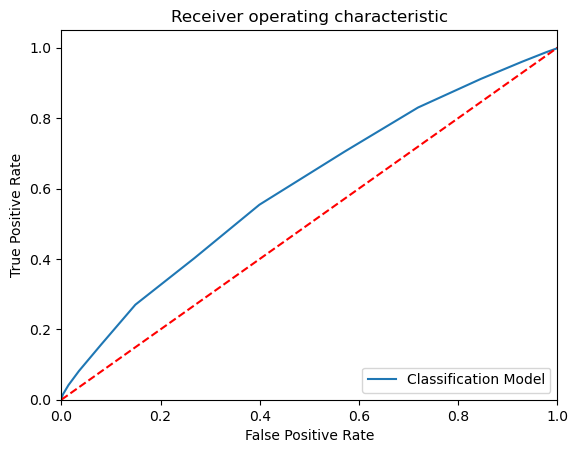

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[1629 1808]
 [1325 2738]]
Outcome values : 
 1629 1808 1325 2738
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.47      0.51      3437
           0       0.60      0.67      0.64      4063

    accuracy                           0.58      7500
   macro avg       0.58      0.57      0.57      7500
weighted avg       0.58      0.58      0.58      7500

Accuracy : 58.2 %
Precision : 55.1 %
Recall : 47.4 %
F1 Score : 0.51
Specificity or True Negative Rate : 67.4 %
Balanced Accuracy : 57.4 %
MCC : 0.151
roc_auc_score: 0.574


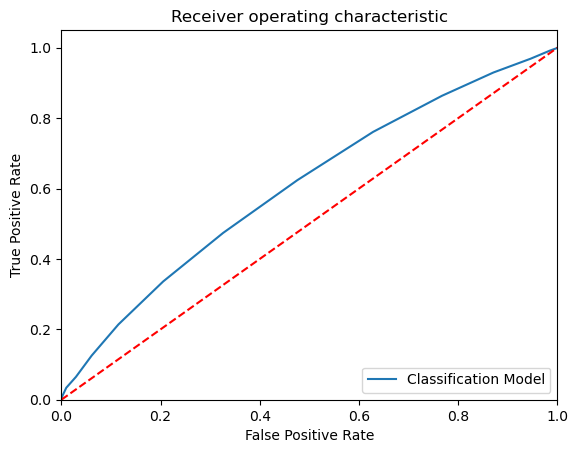

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[1400 2037]
 [1060 3003]]
Outcome values : 
 1400 2037 1060 3003
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.41      0.47      3437
           0       0.60      0.74      0.66      4063

    accuracy                           0.59      7500
   macro avg       0.58      0.57      0.57      7500
weighted avg       0.58      0.59      0.58      7500

Accuracy : 58.7 %
Precision : 56.9 %
Recall : 40.7 %
F1 Score : 0.475
Specificity or True Negative Rate : 73.9 %
Balanced Accuracy : 57.3 %
MCC : 0.155
roc_auc_score: 0.573


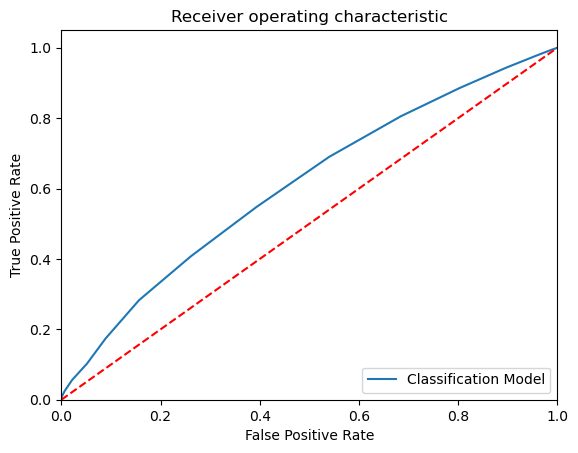

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[1631 1806]
 [1303 2760]]
Outcome values : 
 1631 1806 1303 2760
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.47      0.51      3437
           0       0.60      0.68      0.64      4063

    accuracy                           0.59      7500
   macro avg       0.58      0.58      0.58      7500
weighted avg       0.58      0.59      0.58      7500

Accuracy : 58.5 %
Precision : 55.6 %
Recall : 47.5 %
F1 Score : 0.512
Specificity or True Negative Rate : 67.9 %
Balanced Accuracy : 57.7 %
MCC : 0.157
roc_auc_score: 0.577


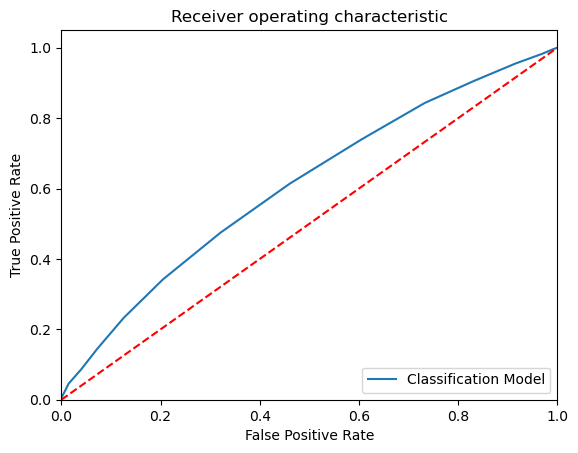

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[1401 2036]
 [1056 3007]]
Outcome values : 
 1401 2036 1056 3007
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.41      0.48      3437
           0       0.60      0.74      0.66      4063

    accuracy                           0.59      7500
   macro avg       0.58      0.57      0.57      7500
weighted avg       0.58      0.59      0.58      7500

Accuracy : 58.8 %
Precision : 57.0 %
Recall : 40.8 %
F1 Score : 0.475
Specificity or True Negative Rate : 74.0 %
Balanced Accuracy : 57.4 %
MCC : 0.157
roc_auc_score: 0.574


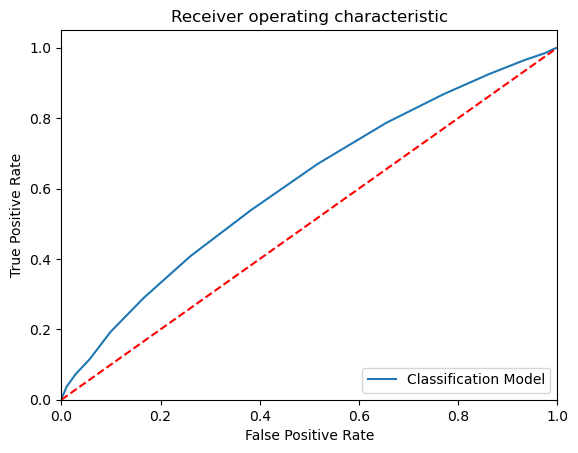

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[1634 1803]
 [1283 2780]]
Outcome values : 
 1634 1803 1283 2780
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.48      0.51      3437
           0       0.61      0.68      0.64      4063

    accuracy                           0.59      7500
   macro avg       0.58      0.58      0.58      7500
weighted avg       0.59      0.59      0.58      7500

Accuracy : 58.9 %
Precision : 56.0 %
Recall : 47.5 %
F1 Score : 0.514
Specificity or True Negative Rate : 68.4 %
Balanced Accuracy : 58.0 %
MCC : 0.163
roc_auc_score: 0.58


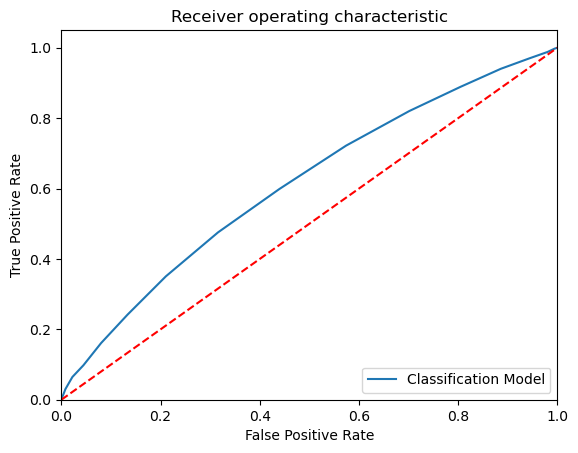

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[1420 2017]
 [1054 3009]]
Outcome values : 
 1420 2017 1054 3009
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.41      0.48      3437
           0       0.60      0.74      0.66      4063

    accuracy                           0.59      7500
   macro avg       0.59      0.58      0.57      7500
weighted avg       0.59      0.59      0.58      7500

Accuracy : 59.1 %
Precision : 57.4 %
Recall : 41.3 %
F1 Score : 0.48
Specificity or True Negative Rate : 74.1 %
Balanced Accuracy : 57.7 %
MCC : 0.163
roc_auc_score: 0.577


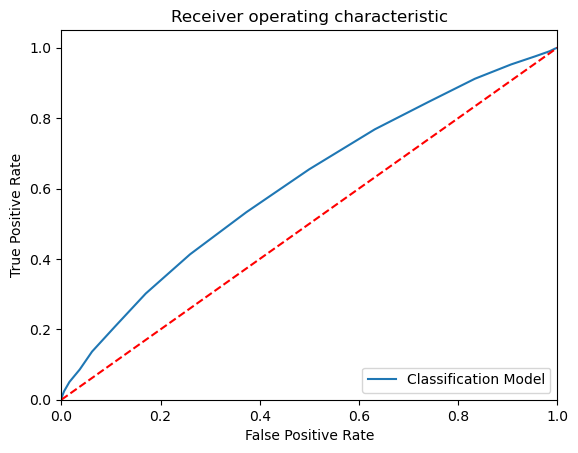

In [26]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    
    #------KNN_Results------------------------------------------------------------------------

In [27]:
#display KNN_Results

KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1690,1747,1716,2347,0.538,0.496,0.492,0.494,0.578,0.069,0.534680,0.535
1,KNeighborsClassifier(n_neighbors=2),2,905,2532,771,3292,0.560,0.540,0.263,0.354,0.810,0.088,0.536775,0.536
2,KNeighborsClassifier(n_neighbors=3),3,1700,1737,1553,2510,0.561,0.523,0.495,0.508,0.618,0.113,0.556194,0.556
3,KNeighborsClassifier(n_neighbors=4),4,1131,2306,944,3119,0.567,0.545,0.329,0.410,0.768,0.108,0.548363,0.548
4,KNeighborsClassifier(),5,1663,1774,1484,2579,0.566,0.528,0.484,0.505,0.635,0.120,0.559302,0.560
5,KNeighborsClassifier(n_neighbors=6),6,1239,2198,1001,3062,0.573,0.553,0.360,0.436,0.754,0.124,0.557060,0.557
6,KNeighborsClassifier(n_neighbors=7),7,1661,1776,1463,2600,0.568,0.532,0.483,0.506,0.640,0.125,0.561596,0.562
7,KNeighborsClassifier(n_neighbors=8),8,1282,2155,1021,3042,0.577,0.557,0.373,0.447,0.749,0.131,0.560854,0.561
8,KNeighborsClassifier(n_neighbors=9),9,1646,1791,1403,2660,0.574,0.540,0.479,0.508,0.655,0.136,0.566797,0.567
9,KNeighborsClassifier(n_neighbors=10),10,1302,2135,1043,3020,0.576,0.555,0.379,0.450,0.743,0.131,0.561056,0.561


# SVM Algorithm

In [28]:
#load the EMResults data

EMResults1=pd.read_csv(r"C:\H6\EMResults.csv")

Model Name:  SVM - Linear
Confusion matrix : 
 [[ 974 2463]
 [ 497 3566]]
Outcome values : 
 974 2463 497 3566
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.28      0.40      3437
           0       0.59      0.88      0.71      4063

    accuracy                           0.61      7500
   macro avg       0.63      0.58      0.55      7500
weighted avg       0.62      0.61      0.56      7500

Accuracy : 60.5 %
Precision : 66.2 %
Recall : 28.3 %
F1 Score : 0.397
Specificity or True Negative Rate : 87.8 %
Balanced Accuracy : 58.0 %
MCC : 0.202
roc_auc_score: 0.581


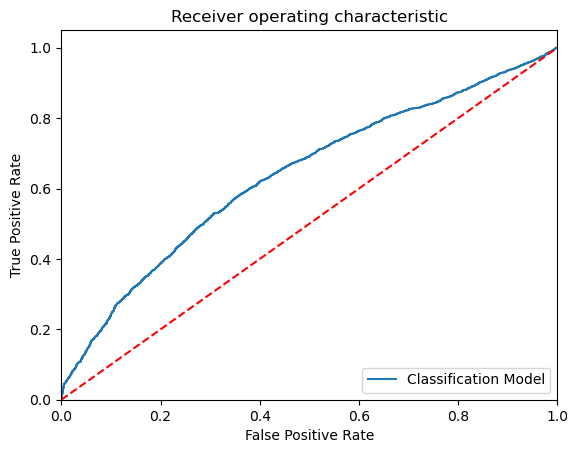

-----------------------------------------------------------------------------------------------------


In [29]:
#SVM-linear

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---

new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[1260 2177]
 [ 691 3372]]
Outcome values : 
 1260 2177 691 3372
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.37      0.47      3437
           0       0.61      0.83      0.70      4063

    accuracy                           0.62      7500
   macro avg       0.63      0.60      0.58      7500
weighted avg       0.63      0.62      0.59      7500

Accuracy : 61.8 %
Precision : 64.6 %
Recall : 36.7 %
F1 Score : 0.468
Specificity or True Negative Rate : 83.0 %
Balanced Accuracy : 59.8 %
MCC : 0.223
roc_auc_score: 0.598


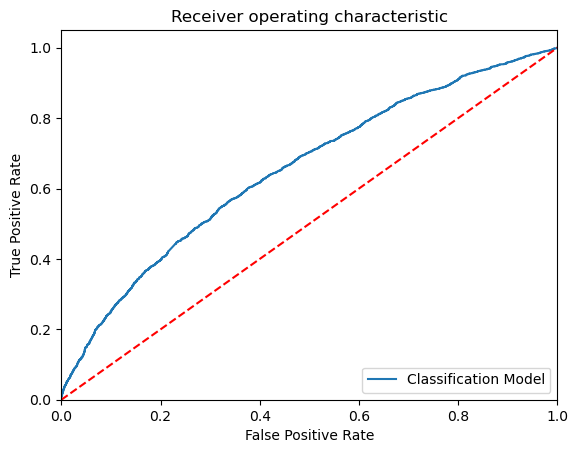

-----------------------------------------------------------------------------------------------------


In [30]:
#SVM-poly

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---

new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)

#-----------------------------------------------------------------------------------------------

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[1987 1450]
 [1505 2558]]
Outcome values : 
 1987 1450 1505 2558
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.58      0.57      3437
           0       0.64      0.63      0.63      4063

    accuracy                           0.61      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.61      0.61      0.61      7500

Accuracy : 60.6 %
Precision : 56.9 %
Recall : 57.8 %
F1 Score : 0.574
Specificity or True Negative Rate : 63.0 %
Balanced Accuracy : 60.4 %
MCC : 0.207
roc_auc_score: 0.604


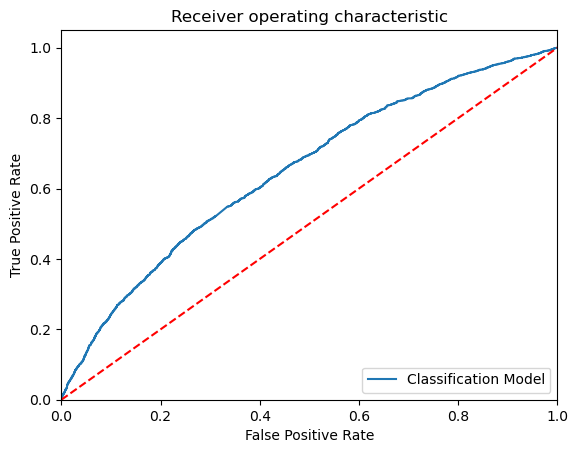

-----------------------------------------------------------------------------------------------------


In [31]:
#SVM-rbf

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[1470 1967]
 [2019 2044]]
Outcome values : 
 1470 1967 2019 2044
Classification report : 
               precision    recall  f1-score   support

           1       0.42      0.43      0.42      3437
           0       0.51      0.50      0.51      4063

    accuracy                           0.47      7500
   macro avg       0.47      0.47      0.47      7500
weighted avg       0.47      0.47      0.47      7500

Accuracy : 46.9 %
Precision : 42.1 %
Recall : 42.8 %
F1 Score : 0.424
Specificity or True Negative Rate : 50.3 %
Balanced Accuracy : 46.6 %
MCC : -0.069
roc_auc_score: 0.465


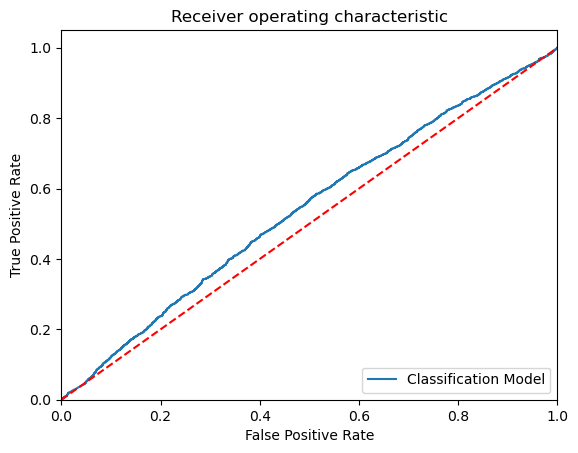

-----------------------------------------------------------------------------------------------------


In [32]:
#SVM-sigmoid


# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---

new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)

#-----------------------------------------------------------------------------------------------------------

In [33]:
#Display EMResults for SVM-linear,SVM-poly,SVM-rbf,SVM-sigmoid

EMResults1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,974,2463,497,3566,0.605,0.662,0.283,0.397,0.878,0.202,0.580532,0.580
1,SVM - Polynominal,1260,2177,691,3372,0.618,0.646,0.367,0.468,0.830,0.223,0.598264,0.598
2,SVM - Gaussian,1987,1450,1505,2558,0.606,0.569,0.578,0.574,0.630,0.207,0.603852,0.604
3,SVM - Sigmoid,1470,1967,2019,2044,0.469,0.421,0.428,0.424,0.503,-0.069,0.465388,0.466


# Comparing all Algorithms

In [34]:
#Load EMResults data

EMResults=pd.read_csv(r"C:\H6\EMResults.csv")

In [35]:
#display EMResults

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[1482 1955]
 [ 903 3160]]
Outcome values : 
 1482 1955 903 3160
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.43      0.51      3437
           0       0.62      0.78      0.69      4063

    accuracy                           0.62      7500
   macro avg       0.62      0.60      0.60      7500
weighted avg       0.62      0.62      0.61      7500

Accuracy : 61.9 %
Precision : 62.1 %
Recall : 43.1 %
F1 Score : 0.509
Specificity or True Negative Rate : 77.8 %
Balanced Accuracy : 60.4 %
MCC : 0.224
roc_auc_score: 0.604


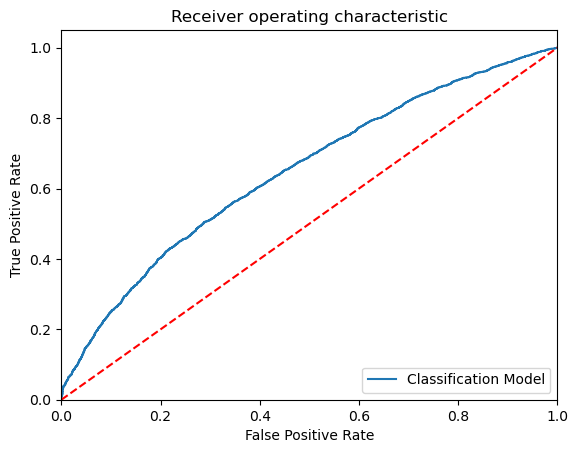

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1774 1663]
 [1743 2320]]
Outcome values : 
 1774 1663 1743 2320
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.52      0.51      3437
           0       0.58      0.57      0.58      4063

    accuracy                           0.55      7500
   macro avg       0.54      0.54      0.54      7500
weighted avg       0.55      0.55      0.55      7500

Accuracy : 54.6 %
Precision : 50.4 %
Recall : 51.6 %
F1 Score : 0.51
Specificity or True Negative Rate : 57.1 %
Balanced Accuracy : 54.4 %
MCC : 0.087
roc_auc_score: 0.544


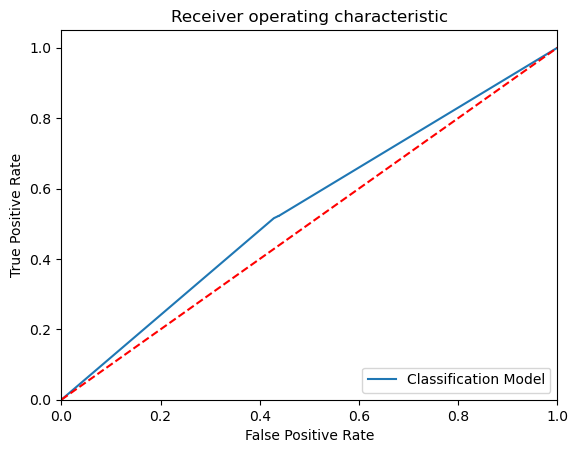

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1793 1644]
 [1448 2615]]
Outcome values : 
 1793 1644 1448 2615
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.52      0.54      3437
           0       0.61      0.64      0.63      4063

    accuracy                           0.59      7500
   macro avg       0.58      0.58      0.58      7500
weighted avg       0.59      0.59      0.59      7500

Accuracy : 58.8 %
Precision : 55.3 %
Recall : 52.2 %
F1 Score : 0.537
Specificity or True Negative Rate : 64.4 %
Balanced Accuracy : 58.3 %
MCC : 0.166
roc_auc_score: 0.583


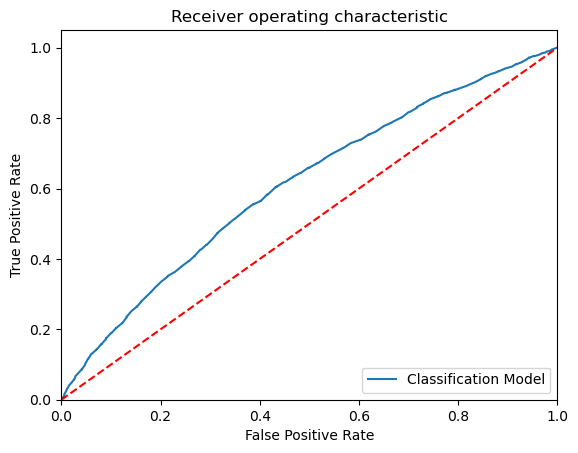

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1861 1576]
 [1560 2503]]
Outcome values : 
 1861 1576 1560 2503
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.54      0.54      3437
           0       0.61      0.62      0.61      4063

    accuracy                           0.58      7500
   macro avg       0.58      0.58      0.58      7500
weighted avg       0.58      0.58      0.58      7500

Accuracy : 58.2 %
Precision : 54.4 %
Recall : 54.1 %
F1 Score : 0.543
Specificity or True Negative Rate : 61.6 %
Balanced Accuracy : 57.8 %
MCC : 0.158
roc_auc_score: 0.579


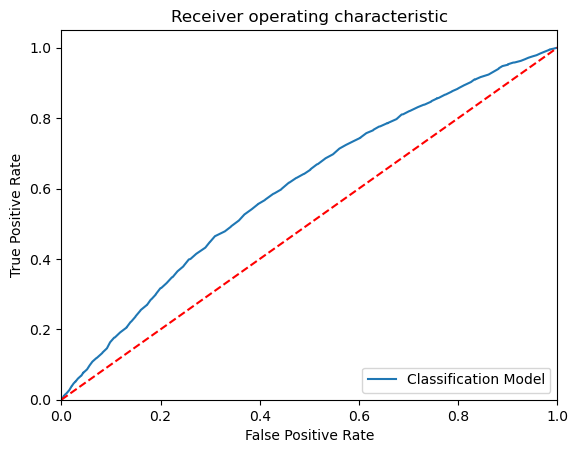

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[1700 1737]
 [1553 2510]]
Outcome values : 
 1700 1737 1553 2510
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.49      0.51      3437
           0       0.59      0.62      0.60      4063

    accuracy                           0.56      7500
   macro avg       0.56      0.56      0.56      7500
weighted avg       0.56      0.56      0.56      7500

Accuracy : 56.1 %
Precision : 52.3 %
Recall : 49.5 %
F1 Score : 0.508
Specificity or True Negative Rate : 61.8 %
Balanced Accuracy : 55.6 %
MCC : 0.113
roc_auc_score: 0.556


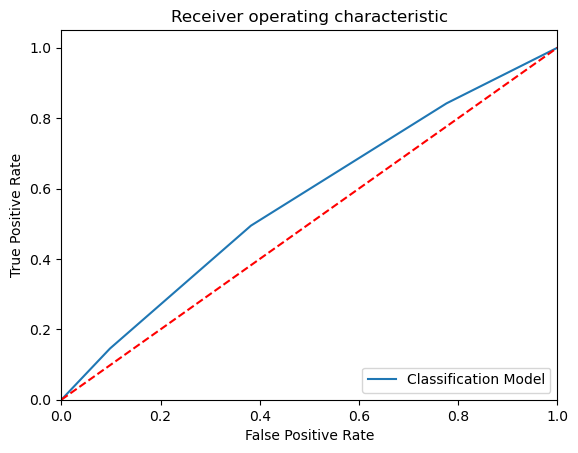

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[1987 1450]
 [1505 2558]]
Outcome values : 
 1987 1450 1505 2558
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.58      0.57      3437
           0       0.64      0.63      0.63      4063

    accuracy                           0.61      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.61      0.61      0.61      7500

Accuracy : 60.6 %
Precision : 56.9 %
Recall : 57.8 %
F1 Score : 0.574
Specificity or True Negative Rate : 63.0 %
Balanced Accuracy : 60.4 %
MCC : 0.207
roc_auc_score: 0.604


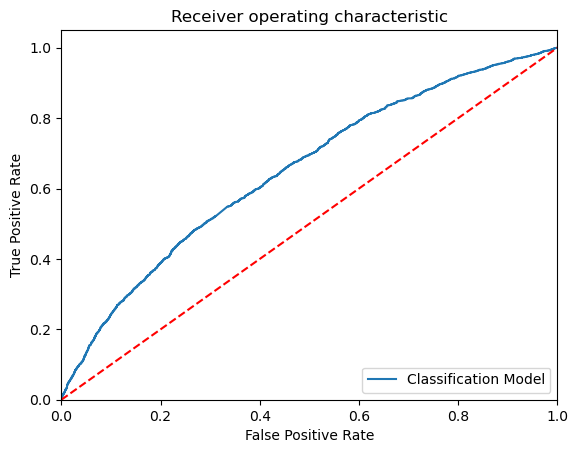

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1203 2234]
 [ 712 3351]]
Outcome values : 
 1203 2234 712 3351
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.35      0.45      3437
           0       0.60      0.82      0.69      4063

    accuracy                           0.61      7500
   macro avg       0.61      0.59      0.57      7500
weighted avg       0.61      0.61      0.58      7500

Accuracy : 60.7 %
Precision : 62.8 %
Recall : 35.0 %
F1 Score : 0.45
Specificity or True Negative Rate : 82.5 %
Balanced Accuracy : 58.7 %
MCC : 0.2
roc_auc_score: 0.587


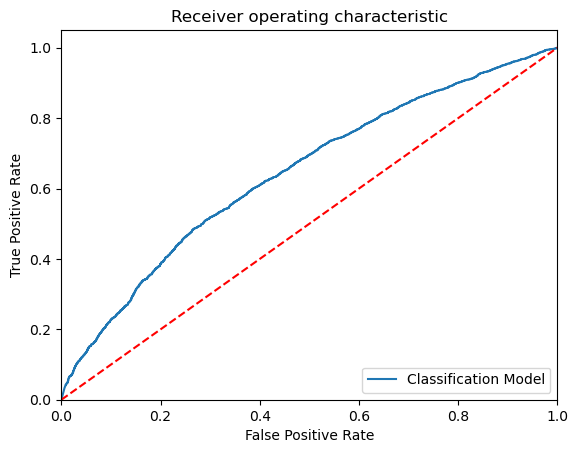

-----------------------------------------------------------------------------------------------------


In [36]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=3)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    
    #----------------------------------------------------------------------------------------------------------

In [48]:
#display EMResults

EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1482,1955,903,3160,0.619,0.621,0.431,0.509,0.778,0.224,0.604470,0.604
1,DecisionTreeClassifier(),1774,1663,1743,2320,0.546,0.504,0.516,0.510,0.571,0.087,0.543577,0.544
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1793,1644,1448,2615,0.588,0.553,0.522,0.537,0.644,0.166,0.582644,0.583
3,"(ExtraTreeClassifier(random_state=543129454), ...",1861,1576,1560,2503,0.582,0.544,0.541,0.543,0.616,0.158,0.578754,0.578
4,KNeighborsClassifier(n_neighbors=3),1700,1737,1553,2510,0.561,0.523,0.495,0.508,0.618,0.113,0.556194,0.556
5,"SVC(class_weight='balanced', probability=True,...",1987,1450,1505,2558,0.606,0.569,0.578,0.574,0.630,0.207,0.603852,0.604
6,GaussianNB(),1203,2234,712,3351,0.607,0.628,0.350,0.450,0.825,0.200,0.587387,0.587


In [38]:
#predict the values with SVM Algorithm

y_predF=ModelSVM.predict(x_test)

In [45]:
Results = pd.DataFrame({'readmitted_A':y_test, 'readmitted_P':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = train_bk.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(10)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,gender_Female,age_[70-80),age_[60-70),age_[50-60),age_[80-90),age_[40-50),payer_code_?,payer_code_MC,payer_code_HM,payer_code_SP,payer_code_BC,medical_specialty_?,medical_specialty_InternalMedicine,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Cardiology,diag_1_428,diag_1_414,diag_1_786,diag_2_276,diag_2_428,diag_2_250,diag_2_427,diag_3_250,diag_3_401,diag_3_276,diag_3_428,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,chlorpropamide_No,glimepiride_No,acetohexamide_No,glipizide_No,glyburide_No,tolbutamide_No,pioglitazone_No,rosiglitazone_No,acarbose_No,miglitol_No,troglitazone_No,tolazamide_No,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted,readmitted_A,readmitted_P
11854,6,34,0,10,0,0,0,6,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,0,0,0
2277,4,36,0,18,0,0,0,8,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,1,1,0
7301,3,55,0,16,0,1,0,9,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,1,1,1
175,9,60,4,10,0,0,1,5,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,0,0,0
14280,3,33,2,6,0,0,0,9,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,0,0,0
4143,2,47,0,2,0,0,0,1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,0,0,0
15205,2,48,2,15,1,0,2,9,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,0,0,1
14929,5,58,1,6,0,0,0,9,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,0,0,0
22716,5,55,0,17,0,0,0,9,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False,Tr